In [1]:
# customer churn Dataset

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [25]:
# A) Data Manipulation:
# a. Find the total number of male customers
# b. Find the total number of customers whose Internet Service is ‘DSL’
# c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the result in ‘new_customer’
# d. Extract all those customers whose tenure is less than 10 months or their Total charges is less than 500$ & store the result in ‘new_customer’

In [26]:
df = pd.read_csv('customer_churn.csv')

In [27]:
df.head(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [29]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [30]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [31]:
df = df.drop('customerID', axis = 1)

In [32]:
count=0
for i in df.TotalCharges:
    if i==' ':
        count+=1
print('count of empty string:- ',count)
#we will replace this empty string to nan values
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)
# typecasting of the TotalCharges column
df['TotalCharges'] = df['TotalCharges'].astype(float)

count of empty string:-  11


In [33]:
df.isnull().sum()


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [34]:
# fill null values with mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [35]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [43]:
#numerical variables

num = list(df.select_dtypes(include=['int64','float64']).keys())

#categorical variables

cat = list(df.select_dtypes(include='O').keys())

print(cat)

print(num)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [44]:
# value_counts of the categorical columns
for i in cat:
    print(df[i].value_counts())
# as we see that there is extra categories which we have to convert it into No.
df.MultipleLines = df.MultipleLines.replace('No phone service','No')
df.OnlineSecurity = df.OnlineSecurity.replace('No internet service','No')
df.OnlineBackup = df.OnlineBackup.replace('No internet service','No')
df.DeviceProtection = df.DeviceProtection.replace('No internet service','No')
df.TechSupport = df.TechSupport.replace('No internet service','No')
df.StreamingTV = df.StreamingTV.replace('No internet service','No')
df.StreamingMovies = df.StreamingMovies.replace('No internet service','No')

Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV

In [45]:
# we have to handel this all categorical variables
# there are mainly Yes/No features in most of the columns
# we will convert Yes = 1 and No = 0
for i in cat:
    df[i] = df[i].replace('Yes',1)
    df[i] = df[i].replace('No',0)

In [46]:
# we will convert male = 1 and female = 0
df.gender = df.gender.replace('Male',1)
df.gender = df.gender.replace('Female',0)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [48]:
p = list(map(str, df['InternetService']))
p

['DSL',
 'DSL',
 'DSL',
 'DSL',
 'Fiber optic',
 'Fiber optic',
 'Fiber optic',
 'DSL',
 'Fiber optic',
 'DSL',
 'DSL',
 '0',
 'Fiber optic',
 'Fiber optic',
 'Fiber optic',
 'Fiber optic',
 '0',
 'Fiber optic',
 'DSL',
 'Fiber optic',
 'DSL',
 '0',
 '0',
 'DSL',
 'DSL',
 'DSL',
 'Fiber optic',
 'DSL',
 'DSL',
 'DSL',
 'Fiber optic',
 'Fiber optic',
 'DSL',
 '0',
 'DSL',
 'Fiber optic',
 'Fiber optic',
 'Fiber optic',
 'Fiber optic',
 'Fiber optic',
 'DSL',
 'DSL',
 '0',
 'DSL',
 'DSL',
 'Fiber optic',
 'DSL',
 'Fiber optic',
 'DSL',
 'DSL',
 'Fiber optic',
 'Fiber optic',
 'DSL',
 'Fiber optic',
 'DSL',
 'Fiber optic',
 'Fiber optic',
 'Fiber optic',
 '0',
 'Fiber optic',
 'Fiber optic',
 'Fiber optic',
 'DSL',
 'DSL',
 'Fiber optic',
 'DSL',
 'Fiber optic',
 'DSL',
 '0',
 'Fiber optic',
 'DSL',
 '0',
 'Fiber optic',
 '0',
 'DSL',
 'Fiber optic',
 'DSL',
 'DSL',
 'DSL',
 '0',
 'Fiber optic',
 'DSL',
 'Fiber optic',
 'Fiber optic',
 '0',
 'Fiber optic',
 'DSL',
 '0',
 '0',
 'DSL',
 'Fi

In [47]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Contract'] = label.fit_transform(df['Contract'])
df['PaymentMethod'] = label.fit_transform(df['PaymentMethod'])

In [49]:
df['InternetService'] = label.fit_transform(p)

In [50]:
df['InternetService']

0       1
1       1
2       1
3       1
4       2
       ..
7038    1
7039    2
7040    1
7041    2
7042    2
Name: InternetService, Length: 7043, dtype: int64

In [51]:
scale_cols = ['tenure','MonthlyCharges','TotalCharges']
# now we scling all the data
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df[scale_cols] = scale.fit_transform(df[scale_cols])

In [54]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure              float64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [38]:
# A Data manipulation
# a) Gives number of males as customer
male_count = sum(df['gender']== 'Male')
male_count

3555

In [39]:
# b) total number of customers whose internet is 'DSL'
internet_type = sum(df['InternetService'] == 'DSL')

In [40]:
internet_type

2421

In [41]:
# c)
new_customer = df[(df['gender'] == 'Female') & (df['SeniorCitizen']==1) & (df['PaymentMethod']== 'Mailed Check')]
new_customer.head(5)

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

In [57]:
#d)
new_customer = df[(df['tenure'] < 10 ) | (df['TotalCharges'] < 500)]
new_customer.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0  0.013889             0   
1       1              0        0           0  0.472222             1   
2       1              0        0           0  0.027778             1   
3       1              0        0           0  0.625000             0   
4       0              0        0           0  0.027778             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              0                1               0             1   
1              0                1               1             0   
2              0                1               1             1   
3              0                1               1             0   
4              0                2               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 1            0            0                0         1   
2                 0            0            0                0         0   
3                 1            1            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2        0.115423      0.001275      0  
1                 0              3        0.385075      0.215867      0  
2                 1              3        0.354229      0.010310      1  
3                 0              0        0.239303      0.210241      0  
4                 1              2        0.521891      0.015330      1

B) Data Visualization:
a. Build a pie-chart to show the distribution of customers would be churning out
b. Build a bar-plot to show the distribution of ‘Internet Service’

In [58]:
# B Data visualization
# a)
df_names = df['Churn'].value_counts().tolist()
df_sizes = df['Churn'].value_counts().tolist()

In [59]:
df_names

[5174, 1869]

In [60]:
df_sizes

[5174, 1869]

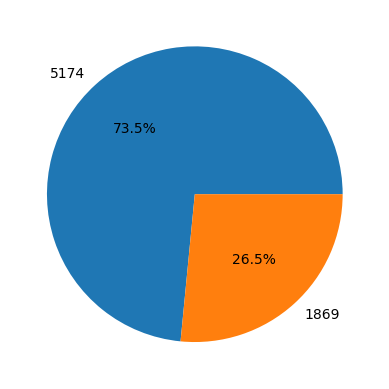

In [61]:
# a)
plt.pie(df_sizes, labels = df_names , autopct = '%1.1f%%')
plt.show()

<BarContainer object of 3 artists>

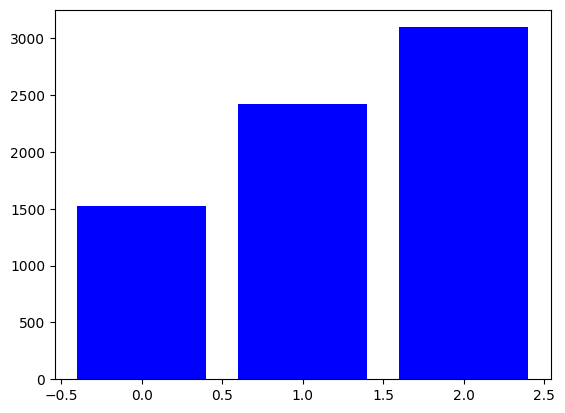

In [62]:
# b)
plt.bar(df['InternetService'].value_counts().keys().tolist(), df['InternetService'].value_counts().tolist(), color = 'blue')

In [142]:
#i)
x = df[['tenure']]
x

tenure
0     0.013889
1     0.472222
2     0.027778
3     0.625000
4     0.027778
...        ...
7038  0.333333
7039  1.000000
7040  0.152778
7041  0.055556
7042  0.916667

[7043 rows x 1 columns]

In [143]:
y= df[['Churn']]
y

Churn
0         0
1         0
2         1
3         0
4         1
...     ...
7038      0
7039      0
7040      0
7041      1
7042      0

[7043 rows x 1 columns]

In [144]:
x.shape, y.shape

((7043, 1), (7043, 1))

In [145]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state = 42)

In [146]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4930, 1), (4930, 1), (2113, 1), (2113, 1))

In [72]:
x_test

tenure
185   0.013889
2715  0.569444
3825  0.722222
1807  0.013889
132   0.930556
...        ...
5522  0.013889
6377  0.013889
5500  0.833333
2392  0.277778
6705  0.305556

[2113 rows x 1 columns]

In [73]:
y_test

Churn
185       1
2715      0
3825      0
1807      1
132       0
...     ...
5522      1
6377      1
5500      0
2392      0
6705      0

[2113 rows x 1 columns]

In [ ]:
del model

In [74]:
model = tf.keras.models.Sequential()

In [75]:
model.add(tf.keras.layers.Dense(12, input_dim = 1, activation=tf.keras.activations.relu, name = "InputLayer"))
model.add(tf.keras.layers.Dense(8, activation = tf.keras.activations.relu, name = "HiddenLayer1"))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'Output'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Dense)          (None, 12)                24        
                                                                 
 HiddenLayer1 (Dense)        (None, 8)                 104       
                                                                 
 Output (Dense)              (None, 1)                 9         
                                                                 
Total params: 137 (548.00 Byte)
Trainable params: 137 (548.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics =['accuracy'])

In [77]:
model.fit(x_train, y_train, epochs =150, validation_data= (x_test, y_test))

Epoch 1/150
155/155 [==============================] - 1s 4ms/step - loss: 0.6069 - accuracy: 0.7000 - val_loss: 0.5484 - val_accuracy: 0.7283
Epoch 2/150
155/155 [==============================] - 0s 3ms/step - loss: 0.5321 - accuracy: 0.7373 - val_loss: 0.5304 - val_accuracy: 0.7283
Epoch 3/150
155/155 [==============================] - 0s 2ms/step - loss: 0.5235 - accuracy: 0.7373 - val_loss: 0.5236 - val_accuracy: 0.7283
Epoch 4/150
155/155 [==============================] - 0s 2ms/step - loss: 0.5185 - accuracy: 0.7373 - val_loss: 0.5184 - val_accuracy: 0.7283
Epoch 5/150
155/155 [==============================] - 0s 2ms/step - loss: 0.5151 - accuracy: 0.7373 - val_loss: 0.5147 - val_accuracy: 0.7283
Epoch 6/150
155/155 [==============================] - 0s 3ms/step - loss: 0.5130 - accuracy: 0.7373 - val_loss: 0.5127 - val_accuracy: 0.7283
Epoch 7/150
155/155 [==============================] - 0s 2ms/step - loss: 0.5115 - accuracy: 0.7373 - val_loss: 0.5105 - val_accuracy: 0.7283

In [78]:
model.history.history["accuracy"]

[0.699999988079071,
 0.7373225092887878,
 0.7373225092887878,
 0.7373225092887878,
 0.7373225092887878,
 0.7373225092887878,
 0.7373225092887878,
 0.7373225092887878,
 0.7365111708641052,
 0.7448275685310364,
 0.7492900490760803,
 0.7525355219841003,
 0.7498985528945923,
 0.7529411911964417,
 0.7555781006813049,
 0.751115620136261,
 0.7543610334396362,
 0.7535496950149536,
 0.7541581988334656,
 0.7531440258026123,
 0.7537525296211243,
 0.7553752660751343,
 0.7537525296211243,
 0.7559837698936462,
 0.7541581988334656,
 0.7543610334396362,
 0.7535496950149536,
 0.753346860408783,
 0.7525355219841003,
 0.7539553642272949,
 0.754969596862793,
 0.7545638680458069,
 0.7541581988334656,
 0.7545638680458069,
 0.7537525296211243,
 0.7551724314689636,
 0.7543610334396362,
 0.7539553642272949,
 0.7561866044998169,
 0.752738356590271,
 0.7535496950149536,
 0.7543610334396362,
 0.7555781006813049,
 0.7569979429244995,
 0.7543610334396362,
 0.7523326277732849,
 0.7543610334396362,
 0.752941191196441

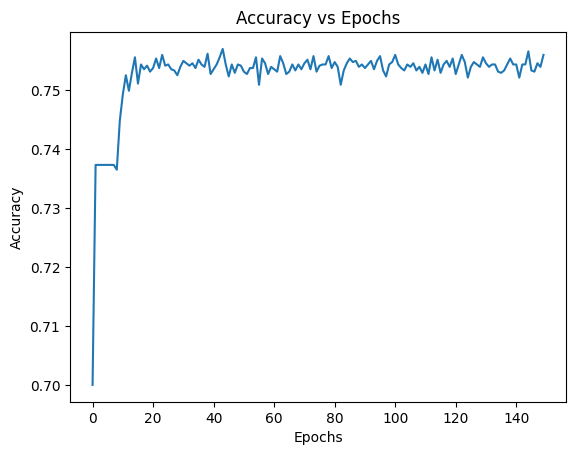

In [79]:
plt.plot(model.history.history['accuracy'])
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [80]:
from sklearn.metrics import confusion_matrix

In [81]:
y_pred = model.predict(x_test)

67/67 [==============================] - 0s 1ms/step


In [90]:
q= np.argmax(model.predict(x_test))

67/67 [==============================] - 0s 3ms/step


In [100]:
y_pred= y_pred >0.5

In [101]:
y_pred

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [102]:
y_test = y_test != 0.0


In [103]:
print("Converted bool value:", y_test)

Converted bool value: [[ True]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [104]:
y_test

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [105]:
confusion_matrix(y_test, y_pred)

array([[1392,  147],
       [ 379,  195]])

b. Build the 2nd model using same target and feature variables:

i. Add a drop-out layer after the input layer with drop-out value of 0.3

ii. Add a drop-out layer after the hidden layer with drop-out value of 0.2

iii. Predict the values on the test set and build a confusion matrix

iv. Plot the ‘Accuracy vs Epochs’ graph

In [147]:
x = df[['tenure']]
x

tenure
0     0.013889
1     0.472222
2     0.027778
3     0.625000
4     0.027778
...        ...
7038  0.333333
7039  1.000000
7040  0.152778
7041  0.055556
7042  0.916667

[7043 rows x 1 columns]

In [148]:
y= df[['Churn']]
y

Churn
0         0
1         0
2         1
3         0
4         1
...     ...
7038      0
7039      0
7040      0
7041      1
7042      0

[7043 rows x 1 columns]

In [149]:
x.shape, y.shape

((7043, 1), (7043, 1))

In [150]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state = 42)

In [151]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4930, 1), (4930, 1), (2113, 1), (2113, 1))

In [152]:
x_test

tenure
185   0.013889
2715  0.569444
3825  0.722222
1807  0.013889
132   0.930556
...        ...
5522  0.013889
6377  0.013889
5500  0.833333
2392  0.277778
6705  0.305556

[2113 rows x 1 columns]

In [153]:
y_test

Churn
185       1
2715      0
3825      0
1807      1
132       0
...     ...
5522      1
6377      1
5500      0
2392      0
6705      0

[2113 rows x 1 columns]

In [154]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [162]:
del model

In [163]:
model = Sequential()
model.add(Dense(12, input_dim =1, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation = 'relu', name = "HiddenLayer1"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid', name = 'Output'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 12)                24        
                                                                 
 dropout_11 (Dropout)        (None, 12)                0         
                                                                 
 HiddenLayer1 (Dense)        (None, 8)                 104       
                                                                 
 dropout_12 (Dropout)        (None, 8)                 0         
                                                                 
 Output (Dense)              (None, 1)                 9         
                                                                 
Total params: 137 (548.00 Byte)
Trainable params: 137 (548.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [164]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics =['acc'])


In [165]:
model.fit(x_train,y_train, epochs = 150, validation_data = (x_test, y_test))

Epoch 1/150
155/155 [==============================] - 2s 5ms/step - loss: 0.6016 - acc: 0.7039 - val_loss: 0.5403 - val_acc: 0.7283
Epoch 2/150
155/155 [==============================] - 1s 4ms/step - loss: 0.5404 - acc: 0.7373 - val_loss: 0.5236 - val_acc: 0.7283
Epoch 3/150
155/155 [==============================] - 0s 3ms/step - loss: 0.5319 - acc: 0.7371 - val_loss: 0.5182 - val_acc: 0.7283
Epoch 4/150
155/155 [==============================] - 0s 3ms/step - loss: 0.5274 - acc: 0.7371 - val_loss: 0.5137 - val_acc: 0.7283
Epoch 5/150
155/155 [==============================] - 0s 3ms/step - loss: 0.5236 - acc: 0.7367 - val_loss: 0.5134 - val_acc: 0.7283
Epoch 6/150
155/155 [==============================] - 0s 2ms/step - loss: 0.5224 - acc: 0.7365 - val_loss: 0.5119 - val_acc: 0.7283
Epoch 7/150
155/155 [==============================] - 0s 2ms/step - loss: 0.5224 - acc: 0.7434 - val_loss: 0.5110 - val_acc: 0.7283
Epoch 8/150
155/155 [==============================] - 0s 3ms/step - 

In [166]:
model.history.history['acc']

[0.703853964805603,
 0.7373225092887878,
 0.7371196746826172,
 0.7371196746826172,
 0.7367140054702759,
 0.7365111708641052,
 0.7434077262878418,
 0.7403650879859924,
 0.7411764860153198,
 0.7407708168029785,
 0.745030403137207,
 0.7470588088035583,
 0.749492883682251,
 0.7478702068328857,
 0.7537525296211243,
 0.7436105608940125,
 0.7498985528945923,
 0.7521297931671143,
 0.7531440258026123,
 0.7490872144699097,
 0.7501014471054077,
 0.7464503049850464,
 0.7519269585609436,
 0.7545638680458069,
 0.7519269585609436,
 0.749492883682251,
 0.748275876045227,
 0.7490872144699097,
 0.7525355219841003,
 0.752738356590271,
 0.754969596862793,
 0.7507099509239197,
 0.7541581988334656,
 0.7535496950149536,
 0.7478702068328857,
 0.7480730414390564,
 0.7519269585609436,
 0.753346860408783,
 0.7484787106513977,
 0.7490872144699097,
 0.7501014471054077,
 0.7501014471054077,
 0.751115620136261,
 0.7498985528945923,
 0.7545638680458069,
 0.7525355219841003,
 0.7492900490760803,
 0.7521297931671143,
 

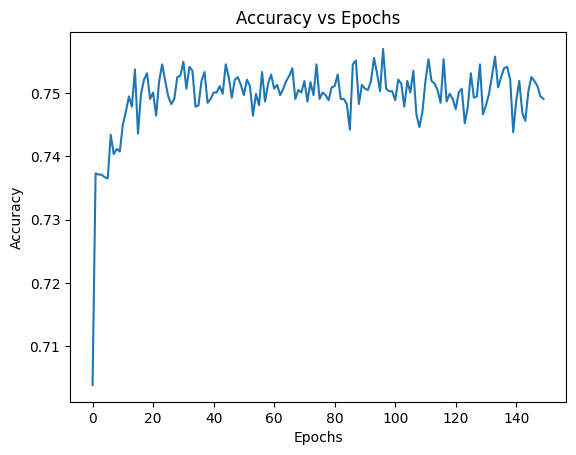

In [167]:
plt.plot(model.history.history['acc'])
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [168]:
y_pred  =  model.predict(x_test)
y_pred

67/67 [==============================] - 0s 1ms/step


array([[0.5299583 ],
       [0.21639341],
       [0.17800754],
       ...,
       [0.15358238],
       [0.3051874 ],
       [0.29589656]], dtype=float32)

In [169]:
y_pred= y_pred >0.5

In [170]:
y_pred

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [171]:
y_test = y_test != 0.0
print("Converted bool value:", y_test)

Converted bool value:       Churn
185    True
2715  False
3825  False
1807   True
132   False
...     ...
5522   True
6377   True
5500  False
2392  False
6705  False

[2113 rows x 1 columns]


In [172]:
y_test

Churn
185    True
2715  False
3825  False
1807   True
132   False
...     ...
5522   True
6377   True
5500  False
2392  False
6705  False

[2113 rows x 1 columns]

In [173]:
confusion_matrix(y_test, y_pred)

array([[1392,  147],
       [ 379,  195]])

c. Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and
‘Churn’ as the dependent/target column:
i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.

ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function

iii. Use ‘Adam’ as the optimization algorithm

iv. Fit the model on the train set, with number of epochs to be 150

v. Predict the values on the test set and build a confusion matrix

vi. Plot the ‘Accuracy vs Epochs’ graph

In [120]:
# 1)
df['MonthlyCharges']

0       0.115423
1       0.385075
2       0.354229
3       0.239303
4       0.521891
          ...   
7038    0.662189
7039    0.845274
7040    0.112935
7041    0.558706
7042    0.869652
Name: MonthlyCharges, Length: 7043, dtype: float64

In [ ]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [121]:
x= df[['MonthlyCharges','tenure','TotalCharges']]

In [122]:
x

MonthlyCharges    tenure  TotalCharges
0           0.115423  0.013889      0.001275
1           0.385075  0.472222      0.215867
2           0.354229  0.027778      0.010310
3           0.239303  0.625000      0.210241
4           0.521891  0.027778      0.015330
...              ...       ...           ...
7038        0.662189  0.333333      0.227521
7039        0.845274  1.000000      0.847461
7040        0.112935  0.152778      0.037809
7041        0.558706  0.055556      0.033210
7042        0.869652  0.916667      0.787641

[7043 rows x 3 columns]

In [123]:
y = df[['Churn']]

In [124]:
y

Churn
0         0
1         0
2         1
3         0
4         1
...     ...
7038      0
7039      0
7040      0
7041      1
7042      0

[7043 rows x 1 columns]

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [126]:
x_test, y_test, x_train, y_train

(      MonthlyCharges    tenure  TotalCharges
 185         0.065174  0.013889      0.000692
 2715        0.069652  0.569444      0.112814
 3825        0.010945  0.722222      0.116882
 1807        0.578109  0.013889      0.006641
 132         0.321393  0.930556      0.374025
 ...              ...       ...           ...
 6366        0.498010  0.888889      0.503116
 315         0.913433  0.708333      0.654004
 2439        0.016418  0.236111      0.035882
 5002        0.255721  0.958333      0.339407
 1161        0.130348  0.013889      0.001448
 
 [1409 rows x 3 columns],
       Churn
 185       1
 2715      0
 3825      0
 1807      1
 132       0
 ...     ...
 6366      0
 315       0
 2439      0
 5002      0
 1161      1
 
 [1409 rows x 1 columns],
       MonthlyCharges    tenure  TotalCharges
 2142        0.463682  0.291667      0.152089
 1623        0.785572  0.750000      0.589736
 6074        0.051741  0.013889      0.000537
 1362        0.516915  0.055556      0.025288
 6754 

In [127]:
del model

In [128]:
model = Sequential()
model.add(Dense(12, input_dim =3, activation = 'relu'))
model.add(Dense(8, activation = 'relu', name = "HiddenLayer1"))
model.add(Dense(1, activation = 'sigmoid', name = 'Output'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 12)                48        
                                                                 
 HiddenLayer1 (Dense)        (None, 8)                 104       
                                                                 
 Output (Dense)              (None, 1)                 9         
                                                                 
Total params: 161 (644.00 Byte)
Trainable params: 161 (644.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [130]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics =['acc'])

In [131]:
model.fit(x_train, y_train, epochs = 150, batch_size=32, validation_data = (x_test, y_test))

Epoch 1/150
177/177 [==============================] - 2s 5ms/step - loss: 0.6076 - acc: 0.7096 - val_loss: 0.5134 - val_acc: 0.7353
Epoch 2/150
177/177 [==============================] - 0s 3ms/step - loss: 0.4946 - acc: 0.7607 - val_loss: 0.4545 - val_acc: 0.7991
Epoch 3/150
177/177 [==============================] - 0s 2ms/step - loss: 0.4682 - acc: 0.7840 - val_loss: 0.4399 - val_acc: 0.8006
Epoch 4/150
177/177 [==============================] - 0s 2ms/step - loss: 0.4631 - acc: 0.7831 - val_loss: 0.4359 - val_acc: 0.8006
Epoch 5/150
177/177 [==============================] - 0s 2ms/step - loss: 0.4612 - acc: 0.7827 - val_loss: 0.4339 - val_acc: 0.7984
Epoch 6/150
177/177 [==============================] - 0s 2ms/step - loss: 0.4610 - acc: 0.7804 - val_loss: 0.4341 - val_acc: 0.8013
Epoch 7/150
177/177 [==============================] - 0s 2ms/step - loss: 0.4608 - acc: 0.7829 - val_loss: 0.4334 - val_acc: 0.7999
Epoch 8/150
177/177 [==============================] - 0s 2ms/step - 

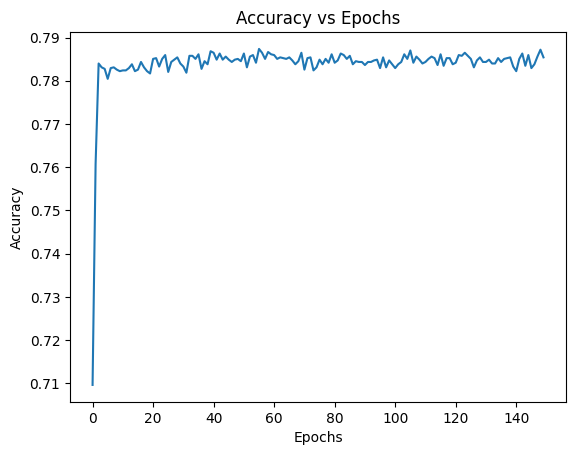

In [132]:
plt.plot(model.history.history['acc'])
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [133]:
y_pred  =  model.predict(x_test)
y_pred

45/45 [==============================] - 0s 1ms/step


array([[0.31903103],
       [0.03253549],
       [0.01840388],
       ...,
       [0.08416741],
       [0.01018206],
       [0.36809307]], dtype=float32)

In [134]:
y_pred= y_pred >0.5
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [135]:
y_test = y_test != 0.0
print("Converted bool value:", y_test)
y_test

Converted bool value:       Churn
185    True
2715  False
3825  False
1807   True
132   False
...     ...
6366  False
315   False
2439  False
5002  False
1161   True

[1409 rows x 1 columns]


Churn
185    True
2715  False
3825  False
1807   True
132   False
...     ...
6366  False
315   False
2439  False
5002  False
1161   True

[1409 rows x 1 columns]

In [136]:
confusion_matrix(y_test, y_pred)

array([[978,  58],
       [233, 140]])